In [3]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import re
import matplotlib.pyplot as plt

/home/vimalkumar.s/Documents/python_new/cde_venv/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [1]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import re
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0102866000.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)


/home/vimalkumar.s/Documents/python_new/cde_venv/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
Using CPU. Note: This module is much faster with a GPU.
/home/vimalkumar.s/Documents/python_new/cde_venv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


['DELDEN MFG', '0$%', '9414 REGISTER FOR', '1ST QUARTER', 'RU  DATE', '3/27/20:', 'TIME', '19', '26: PAGE', '12', 'AiPJC', '100', "'MO STATE: TAX", 'STATE', 'EMP', 'EMPLOYEE', 'NAME;', 'SO', 'SEC', 'YTC:', 'QTD}', 'YTD SU]', 'QTD; SUi', 'QTD  SU1', 'HAGES:', 'QTD', "'NO", 'NUMBER:', 'TAKABLE:', 'TAXABLE', 'TAXABLE', 'TAXABLE', 'TAXABLE', 'OVER', 'NKS', 'WAGES', 'NAGES', 'HAGES_', 'HAGES', 'EAPLOYER', '12000 . 00:', 'VID', '14 JCSEPH  SHIPP', '9495-62-9863', '18,044 .61,', "10 '044 6", '20,587 50', '20,587 50 ', 'iz.000 00', '8,507.39:', 'n2 ', '15 KEVIN: BRISTOW', '496-88-4295', '11,707 51', "41,787 '51", '11,787 51', '11.707 51: 11,707 $', "19: ROY' THORN:", '349-54-2472', '17,312 52', '17,372 52', '21,250 02', '21,250: 02', '92,000:00', '9.250 C2', '24 ROBERT PEREZ', "'492-70-9267", '11,855 46', '1,855 46', '1J,59] jo', '3,.593 30', '12,000.03', '59) . 30:', '"2', '31 LAUREL GOVREAU-SANNE', '494-66-0012', '5,357', '00', '{,157 00', '6,,094 So', '6,.094 50', "'6,094 50", '32 CAROLE SH

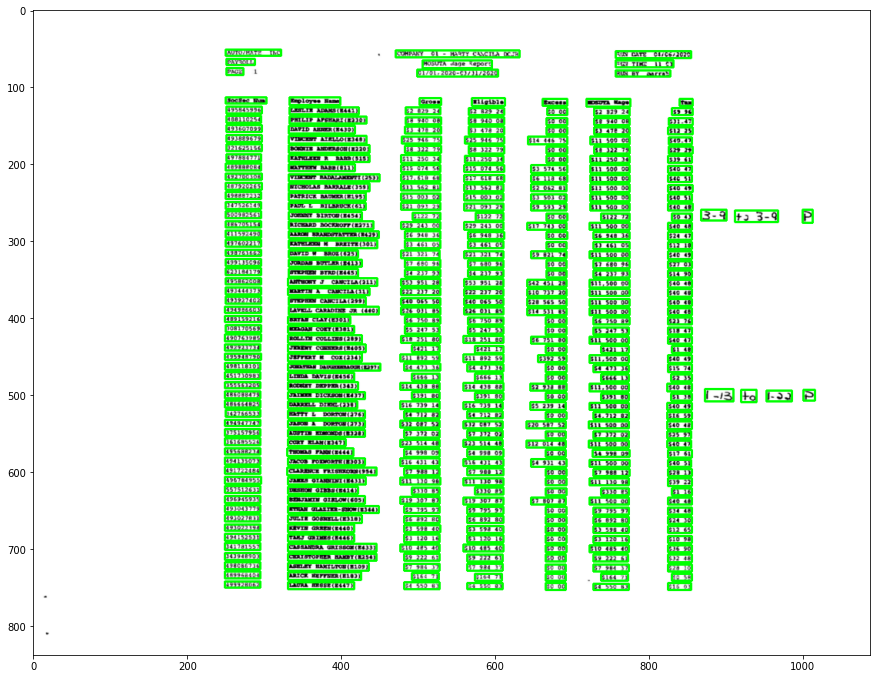

In [4]:
import cv2
import numpy as np

large = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0102880000.jpeg')
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = np.ones((5, 5), np.uint8)
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
plt.figure(figsize=(15,15))        
plt.imshow(rgb)

In [5]:
type(rgb)

numpy.ndarray

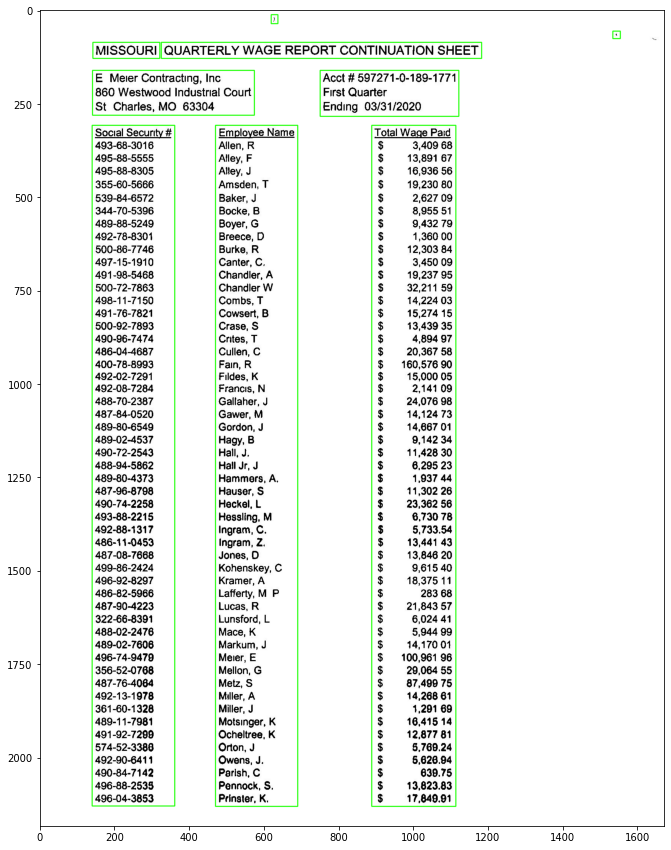

In [10]:
import cv2
import numpy as np

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Create rectangular structuring element and dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours and draw rectangle
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    im = Image.fromarray(image)
    im.save('/home/vimalkumar.s/Documents/backup/samples/0430556000.jpeg')
plt.figure(figsize=(15,15))        

plt.imshow(image)

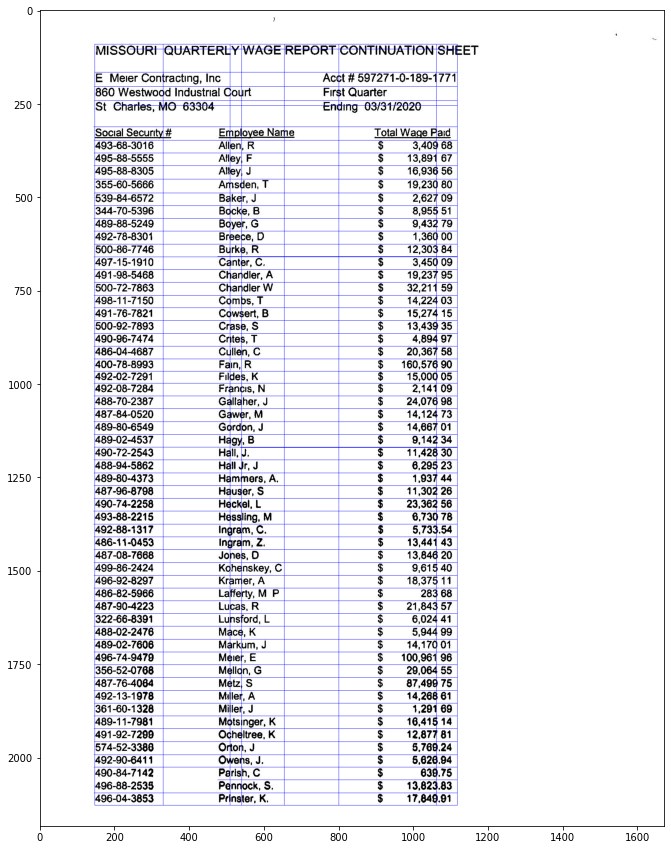

In [17]:
import os
import cv2
import imutils

# This only works if there's only one table on a page
# Important parameters:
#  - morph_size
#  - min_text_height_limit
#  - max_text_height_limit
#  - cell_threshold
#  - min_columns


def pre_process_image(img, save_in_file, morph_size=(8, 8)):

    # get rid of the color
    pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Otsu threshold
    pre = cv2.threshold(pre, 250, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # dilate the text to make it solid spot
    cpy = pre.copy()
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
    cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
    pre = ~cpy

    if save_in_file is not None:
        cv2.imwrite(save_in_file, pre)
    return pre


def find_text_boxes(pre, min_text_height_limit=6, max_text_height_limit=40):
    # Looking for the text spots contours
    # OpenCV 3
    # img, contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # OpenCV 4
    contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Getting the texts bounding boxes based on the text size assumptions
    boxes = []
    for contour in contours:
        box = cv2.boundingRect(contour)
        h = box[3]

        if min_text_height_limit < h < max_text_height_limit:
            boxes.append(box)

    return boxes


def find_table_in_boxes(boxes, cell_threshold=10, min_columns=2):
    rows = {}
    cols = {}

    # Clustering the bounding boxes by their positions
    for box in boxes:
        (x, y, w, h) = box
        col_key = x // cell_threshold
        row_key = y // cell_threshold
        cols[row_key] = [box] if col_key not in cols else cols[col_key] + [box]
        rows[row_key] = [box] if row_key not in rows else rows[row_key] + [box]

    # Filtering out the clusters having less than 2 cols
    table_cells = list(filter(lambda r: len(r) >= min_columns, rows.values()))
    # Sorting the row cells by x coord
    table_cells = [list(sorted(tb)) for tb in table_cells]
    # Sorting rows by the y coord
    table_cells = list(sorted(table_cells, key=lambda r: r[0][1]))

    return table_cells


def build_lines(table_cells):
    if table_cells is None or len(table_cells) <= 0:
        return [], []

    max_last_col_width_row = max(table_cells, key=lambda b: b[-1][2])
    max_x = max_last_col_width_row[-1][0] + max_last_col_width_row[-1][2]

    max_last_row_height_box = max(table_cells[-1], key=lambda b: b[3])
    max_y = max_last_row_height_box[1] + max_last_row_height_box[3]

    hor_lines = []
    ver_lines = []

    for box in table_cells:
        x = box[0][0]
        y = box[0][1]
        hor_lines.append((x, y, max_x, y))

    for box in table_cells[0]:
        x = box[0]
        y = box[1]
        ver_lines.append((x, y, x, max_y))

    (x, y, w, h) = table_cells[0][-1]
    ver_lines.append((max_x, y, max_x, max_y))
    (x, y, w, h) = table_cells[0][0]
    hor_lines.append((x, max_y, max_x, max_y))

    return hor_lines, ver_lines


if __name__ == "__main__":
    in_file = os.path.join("/home/vimalkumar.s/Documents/backup/samples/2", "0430556000.jpeg")
    pre_file = os.path.join("/home/vimalkumar.s/Documents/backup/samples/2", "0430556000.jpeg")
    out_file = os.path.join("/home/vimalkumar.s/Documents/backup/samples/2", "0430556000.jpeg")

    img = cv2.imread(os.path.join(in_file))

    pre_processed = pre_process_image(img, pre_file)
    text_boxes = find_text_boxes(pre_processed)
    cells = find_table_in_boxes(text_boxes)
    hor_lines, ver_lines = build_lines(cells)

    # Visualize the result
    vis = img.copy()

    # for box in text_boxes:
    #     (x, y, w, h) = box
    #     cv2.rectangle(vis, (x, y), (x + w - 2, y + h - 2), (0, 255, 0), 1)

    for line in hor_lines:
        [x1, y1, x2, y2] = line
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

    for line in ver_lines:
        [x1, y1, x2, y2] = line
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

    cv2.imwrite(out_file, vis)
plt.figure(figsize=(15,15))
plt.imshow(vis)

In [22]:
    
    #page_image = Image.open('/home/vimalkumar.s/Documents/backup/samples/2/0430556000.jpeg')
    #page_image.alpha_channel = False #eliminates transperancy
    #img_buffer=np.asarray(bytearray(page_image.make_blob()), dtype=np.uint8)
    #imm = np.asarray(page_image)
    img = cv2.imdecode('/home/vimalkumar.s/Documents/backup/samples/2/0430556000.jpeg', cv2.IMREAD_UNCHANGED)

    ret, thresh = cv2.threshold(img, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    margin=[]
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)
        # Don't plot small false positives that aren't text
        if (w >thresh1 and h> thresh2):
                margin.append([x, y, x + w, y + h])

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'imdecode'
> Overload resolution failed:
>  - buf is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'buf'


In [2]:
pip install pylsd

     |████████████████████████████████| 44 kB 196 kB/s eta 0:00:011
  Created wheel for pylsd: filename=pylsd-0.0.2-py3-none-any.whl size=46364 sha256=ed4a5fafd65ff2de90f22ffb28d374ffe92ea7fcc4f7046f8c52652367e0d924
  Stored in directory: /home/vimalkumar.s/.cache/pip/wheels/9b/63/9d/790450d057de8c5fc9ed261526ce13048db7e365ef5f53ca0e
Successfully built pylsd
You should consider upgrading via the '/home/vimalkumar.s/Documents/python_new/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import numpy as np
import cv2

img = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

lsd = cv2.createLineSegmentDetector(0)
dlines = lsd.detect(gray)

for dline in dlines[0]:
    x0 = int(round(dline[0][0]))
    y0 = int(round(dline[0][1]))
    x1 = int(round(dline[0][2]))
    y1 = int(round(dline[0][3]))
    cv2.line(img, (x0, y0), (x1,y1), 255, 1, cv2.LINE_AA)

    # print line segment length
    a = (x0-x1) * (x0-x1)
    b = (y0-y1) * (y0-y1)
    c = a + b
    print(math.sqrt(c))


error: OpenCV(4.5.2) /tmp/pip-req-build-13uokl4r/opencv/modules/imgproc/src/lsd.cpp:143: error: (-213:The function/feature is not implemented) Implementation has been removed due original code license issues in function 'LineSegmentDetectorImpl'


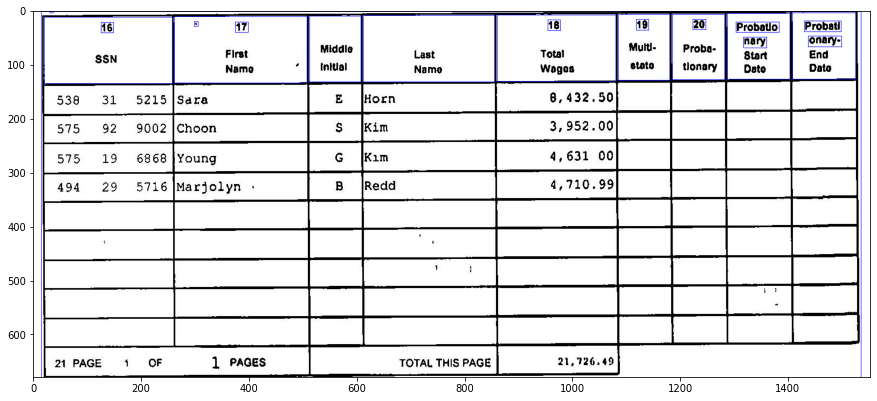

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

file =  r'/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png'

im1 = cv2.imread(file, 0)
im = cv2.imread(file)

ret,thresh_value = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cordinates = []
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cordinates.append((x,y,w,h))
    #bounding the images
    if y< 50:
        
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize = (15,15))        
plt.imshow(im)

In [102]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




          MISSOURI     QUARTERLY     WAGE    REPORT     CONTINUATION      SHEET 
          E  Meter Contracting. Inc                 Acct 4 597271-0-189-1771 
          860 Westwood   Industrial Court           First Quarter 
          St Charles  MO  63304                     Ending  03/31/2020 
          Social Security        Employee Name                Total Wage Paid 
          493-68-3016            Allen R                       $     3.409 68 
          495-88-5555            Alley F                       $    13891 67 
          495-88-8305            Alley J                       $    16.936 56 
          355-60-5666            Amsden. T                     $    19.230 80 
          539-84-6572            Baker J                       $     2.627 09 
          344-70-5396            Bocke B                       $     8955 51 
          489-88-5249            Boyer G                       $     9432 79 
          492-78-8301            Breece. D                     $     136

In [104]:
test1 = text.replace("  ", ",")
test1

'\n,,,,,MISSOURI,, QUARTERLY,, WAGE,,REPORT,, CONTINUATION,,,SHEET \n,,,,,E,Meter Contracting. Inc,,,,,,,, Acct 4 597271-0-189-1771 \n,,,,,860 Westwood, Industrial Court,,,,, First Quarter \n,,,,,St Charles,MO,63304,,,,,,,,,, Ending,03/31/2020 \n,,,,,Social Security,,,,Employee Name,,,,,,,,Total Wage Paid \n,,,,,493-68-3016,,,,,,Allen R,,,,,,,,,,, $,, 3.409 68 \n,,,,,495-88-5555,,,,,,Alley F,,,,,,,,,,, $,,13891 67 \n,,,,,495-88-8305,,,,,,Alley J,,,,,,,,,,, $,,16.936 56 \n,,,,,355-60-5666,,,,,,Amsden. T,,,,,,,,,, $,,19.230 80 \n,,,,,539-84-6572,,,,,,Baker J,,,,,,,,,,, $,, 2.627 09 \n,,,,,344-70-5396,,,,,,Bocke B,,,,,,,,,,, $,, 8955 51 \n,,,,,489-88-5249,,,,,,Boyer G,,,,,,,,,,, $,, 9432 79 \n,,,,,492-78-8301,,,,,,Breece. D,,,,,,,,,, $,, 1360 00 \n,,,,,500-86-7746,,,,,,Burke R,,,,,,,,,,, $,,12.303 84 \n,,,,,497-15-1910,,,,,,Canter C.,,,,,,,,,, $,, 3.450 09 \n,,,,,491-98-5468,,,,,,Chandler A,,,,,,,,,,$,,19237 95 \n,,,,,500-72-7863,,,,,,Chandler W,,,,,,,,,,$,,32.211 59 \n,,,,,498-11-7150,,,

In [105]:
import re
pattern = re.compile(r'(,){2,}')
x = (re.sub(pattern, ',', test1))

In [107]:
text_file = open("/home/vimalkumar.s/Documents/file samples/test/sample.txt", "wt")
n = text_file.write(x)
text_file.close()

In [108]:
import pandas as pd

df = pd.read_csv('/home/vimalkumar.s/Documents/file samples/test/sample.txt')
df

Unnamed: 0         MISSOURI               QUARTERLY  \
0          NaN                E  Meter Contracting. Inc   
1          NaN     860 Westwood        Industrial Court   
2          NaN       St Charles                      MO   
3          NaN  Social Security           Employee Name   
4          NaN      493-68-3016                 Allen R   
5          NaN      495-88-5555                 Alley F   
6          NaN      495-88-8305                 Alley J   
7          NaN      355-60-5666               Amsden. T   
8          NaN      539-84-6572                 Baker J   
9          NaN      344-70-5396                 Bocke B   
10         NaN      489-88-5249                 Boyer G   
11         NaN      492-78-8301               Breece. D   
12         NaN      500-86-7746                 Burke R   
13         NaN      497-15-1910               Canter C.   
14         NaN      491-98-5468              Chandler A   
15         NaN      500-72-7863              Chandler W   
16         NaN      498-11-7150                   Combs   
17         NaN      491-76-7821               Cowsert B   
18         NaN      500-92-7893                Crase. S   
19         NaN      490-96-7474                Crites T   
20         NaN      486-04-4687                Cullen C   
21         NaN      400-78-8993                  Fain R   
22         NaN      492-02-7291                Fildes K   
23         NaN      492-08-7284               Francis N   
24         NaN      488-70-2387              Gallaher J   
25         NaN      487-84-0520                   Gawer   
26         NaN      489-80-6549                Gordon J   
27         NaN      489-02-4537                  Hagy B   
28         NaN      490-72-2543                Hall. J.   
29         NaN      488-94-5862               Hall Jr J   
30         NaN      489-80-4373                 Hammers   
31         NaN      487-96-8798                Hauser S   
32         NaN      490-74-2258                Heckel L   
33         NaN      493-88-2215             Hessling. M   
34         NaN      492-88-1317              Ingram. C.   
35         NaN      486-11-0453              Ingram. Z.   
36         NaN      487-08-7668                 Jones 0   
37         NaN      499-86-2424             Kohenskey C   
38         NaN      496-92-8297                Kramer A   
39         NaN      486-82-5966           Lafferty. M P   
40         NaN      487-90-4223                Lucas. R   
41         NaN      322-66-8391              Lunsford L   
42         NaN      488-02-2476                    Mace   
43         NaN      489-02-7606                  Markum   
44         NaN      496-74-9479                 Meier E   
45         NaN      356-52-0768                Mellon G   
46         NaN      487-76-4064                  Metz S   
47         NaN      492-13-1978               Miller. A   
48         NaN      361-60-1328               Miller. J   
49         NaN      489-11-7981            Motsinger. K   
50         NaN      491-92-7269             Ocheltree K   
51         NaN      574-52-3386                Orton. J   
52         NaN      492-90-6411               Qwens. J.   
53         NaN      490-84-7142                Parish C   
54         NaN      496-88-2535              Pennock S.   
55         NaN      496-04-3853            Prinster. K.   

                          WAGE       REPORT  CONTINUATION  SHEET   
0    Acct 4 597271-0-189-1771           NaN           NaN     NaN  
1               First Quarter           NaN           NaN     NaN  
2                        63304       Ending   03/31/2020      NaN  
3             Total Wage Paid           NaN           NaN     NaN  
4                            $    3.409 68            NaN     NaN  
5                            $    13891 67            NaN     NaN  
6                            $   16.936 56            NaN     NaN  
7                            $   19.230 80            NaN     NaN  
8                           

In [8]:
type(text)

str

In [33]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

file=r'/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png'
img = cv2.imread(file,0)
img.shape

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
img_bin = 255-img_bin
#cv2.imwrite('/home/vimal/Documents/table_detect_samples/opt/0782492000_grey.jpeg',img_bin)

kernel_len = np.array(img).shape[1]//100
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2.imwrite("/home/vimal/Documents/table_detect_samples/opt/0782492000.jpeg", img_vh)

bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
box = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.show()

row=[]
column=[]
j=0
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
#print(column)
#print(row)

countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)
    
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 11')
                inner = inner +" "+ out
            outer.append(inner)
            
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
#print(dataframe)

data = dataframe.style.set_properties(align="left")

#writer = pd.ExcelWriter('output1.xlsx', engine='xlsxwriter')
#data.to_excel(writer, sheet_name='Sheet1')
#writer.save()

data


In [19]:
dataframe

0                                  1  \
0    17\n\nFirst\nNamo\n
 16\n\nSSN\n
   Last\nName\n
 Middle\ninttlal\n
   
1               Sara\n
 538 31 5215\n
                          Horn\n
 
   
2              Choon\n
 575 92 9002\n
                           Kim\n
 
   
3              ~oung\n
 575 19 6868\n
                           Kim\n
 
   
4        Marjolyn ;\n
 494 29 5716.\n
                      \n\nRedd\n
 
   
5                                  
 
                                
 
   
6                                  
 
                                
 
   
7                                  
 
                                
 
   
8                                  
 
                                
 
   
9                                  
 
                                
 
   
10             21 PAGE 4 OF 1 PAGES\n
                 TOTAL THIS PAGE\n
   

                                                    2  
0    Probati\nonary-\nEnd\nDato\n
 Probatlo\nnary\...  
1                                 
 
 
 
 8,432,50\n
  
2                                 
 
 
 
 3,952.00\n
  
3                                 
 
 
 
 4,631 00\n
  
4                                 
 
 
 
 4,710.99\n
  
5                                           
 
 
 
 
  
6                                           
 
 
 
 
  
7                                           
 
 
 
 
  
8                                           
 
 
 
 
  
9                                           
 
 
 
 
  
10                                       21,726.49\n

In [110]:
print(text)


          MISSOURI     QUARTERLY     WAGE    REPORT     CONTINUATION      SHEET 
          E  Meter Contracting. Inc                 Acct 4 597271-0-189-1771 
          860 Westwood   Industrial Court           First Quarter 
          St Charles  MO  63304                     Ending  03/31/2020 
          Social Security        Employee Name                Total Wage Paid 
          493-68-3016            Allen R                       $     3.409 68 
          495-88-5555            Alley F                       $    13891 67 
          495-88-8305            Alley J                       $    16.936 56 
          355-60-5666            Amsden. T                     $    19.230 80 
          539-84-6572            Baker J                       $     2.627 09 
          344-70-5396            Bocke B                       $     8955 51 
          489-88-5249            Boyer G                       $     9432 79 
          492-78-8301            Breece. D                     $     136

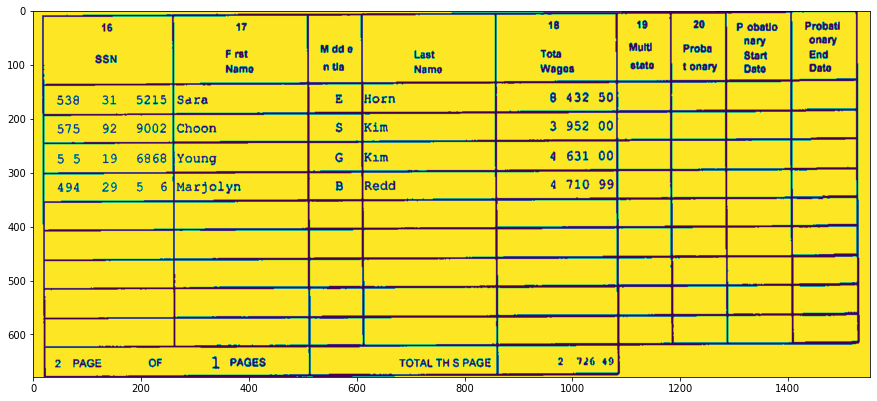

In [183]:
import cv2
import numpy as np

img = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)
plt.figure(figsize = (15,15))
plt.imshow(res)


#cv2.imwrite('res.png', res)

In [164]:
 # importing modules

import cv2
import pytesseract

# reading image using opencv

image = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png')

#converting image into gray scale image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding

# this step is require if you have colored image because if you skip this part

# then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

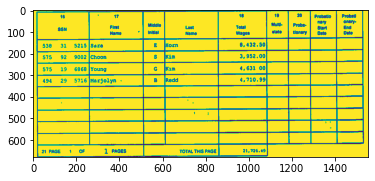

In [165]:
plt.imshow(threshold_img)

In [166]:
custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


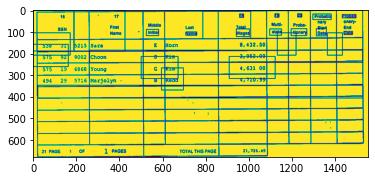

In [167]:
total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(threshold_img)

In [168]:
parse_text = []

word_list = []

last_word = ''

for word in details['text']:

    if word!='':
        word_list.append(word)

        last_word = word

    if (last_word!='' and word == '') or (word==details['text'][-1]):

        parse_text.append(word_list)

        word_list = []

In [169]:
import csv

with open('result_text.txt',  'w', newline="") as file:
    csv.writer(file, delimiter=" ").writerows(parse_text)

In [170]:
print(parse_text)

[['18', '19', '20', 'Probatlo', 'Probati'], ['p=', 'fs', 'fel', '|e', 'Sle'], ['tntdal', 'Name', 'Wages', 'etato', 'tlonary', 'Date', 'Dato'], ['faa', 'awiee', 'epee', '|', '|', '|'], ['[aia', 'nomen', 'ee'], ['raz', 'ewifone', 'eke', 'dT', 'mf', 'PP'], ['Vasa', 'snefecanm', 'fe', 'pee', 'esol', 'Pd'], ['PO'], ['a', 'a', 'OOO'], ['a', 'OO'], ['a', 'OO'], ['a', 'CC']]


In [171]:
type(parse_text)

list

In [172]:
a_dataframe = pd.read_csv("result_text.txt",header=None,delimiter=' ', names=list(range(10)) )

In [173]:
a_dataframe

0          1      2         3        4     5     6   7   8   9
0       18         19     20  Probatlo  Probati   NaN   NaN NaN NaN NaN
1       p=         fs    fel        |e      Sle   NaN   NaN NaN NaN NaN
2   tntdal       Name  Wages     etato  tlonary  Date  Dato NaN NaN NaN
3      faa      awiee   epee         |        |     |   NaN NaN NaN NaN
4     [aia      nomen     ee       NaN      NaN   NaN   NaN NaN NaN NaN
5      raz    ewifone    eke        dT       mf    PP   NaN NaN NaN NaN
6     Vasa  snefecanm     fe       pee     esol    Pd   NaN NaN NaN NaN
7       PO        NaN    NaN       NaN      NaN   NaN   NaN NaN NaN NaN
8        a          a    OOO       NaN      NaN   NaN   NaN NaN NaN NaN
9        a         OO    NaN       NaN      NaN   NaN   NaN NaN NaN NaN
10       a         OO    NaN       NaN      NaN   NaN   NaN NaN NaN NaN
11       a         CC    NaN       NaN      NaN   NaN   NaN NaN NaN NaN

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


0          1      2         3        4      5         6         7  \
0       18         19     20  Probatlo  Probati    NaN       NaN       NaN   
1       p=         fs    fel        |e      Sle    NaN       NaN       NaN   
2   tntdal       Name  Wages     etato  tlonary   Date      Dato       NaN   
3      faa      awiee   epee         |        |      |       NaN       NaN   
4     [aia      nomen     ee       NaN      NaN    NaN       NaN       NaN   
5      raz    ewifone    eke        dT       mf     PP       NaN       NaN   
6     Vasa  snefecanm     fe       pee     esol     Pd       NaN       NaN   
7       PO        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
8        a          a    OOO       NaN      NaN    NaN       NaN       NaN   
9        a         OO    NaN       NaN      NaN    NaN       NaN       NaN   
10       a         OO    NaN       NaN      NaN    NaN       NaN       NaN   
11       a         CC    NaN       NaN      NaN    NaN       NaN       NaN   
12      16          :      7        18       19     20  Probatlo  —Probati   
13       .          .   nary    onary-      NaN    NaN       NaN       NaN   
14     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
15     538         31   5215      Sara        E   Horn  8,432.50       NaN   
16     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
17     575         19   6868     Young        G    Kim     4,631        00   
18     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
19       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
20      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
21      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
22      16          :      7        18       19     20  Probatlo  —Probati   
23       .          .   nary    onary-      NaN    NaN       NaN       NaN   
24     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
25     538         31   5215      Sara        E   Horn  8,432.50       NaN   
26     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
27     575         19   6868     Young        G    Kim     4,631        00   
28     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
29       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
30      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
31      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
32      16          :      7        18       19     20  Probatlo  —Probati   
33       .          .   nary    onary-      NaN    NaN       NaN       NaN   
34     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
35     538         31   5215      Sara        E   Horn  8,432.50       NaN   
36     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
37     575         19   6868     Young        G    Kim     4,631        00   
38     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
39       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
40      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
41      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
42      16          :      7        18       19     20  Probatlo  —Probati   
43       .          .   nary    onary-      NaN    NaN       NaN       NaN   
44     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
45     538         31   5215      Sara        E   Horn  8,432.50       NaN   
46     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
47     575         19   6868     Young        G    Kim     4,631        00   
48     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
49       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
50      ba        NaN    NaN   

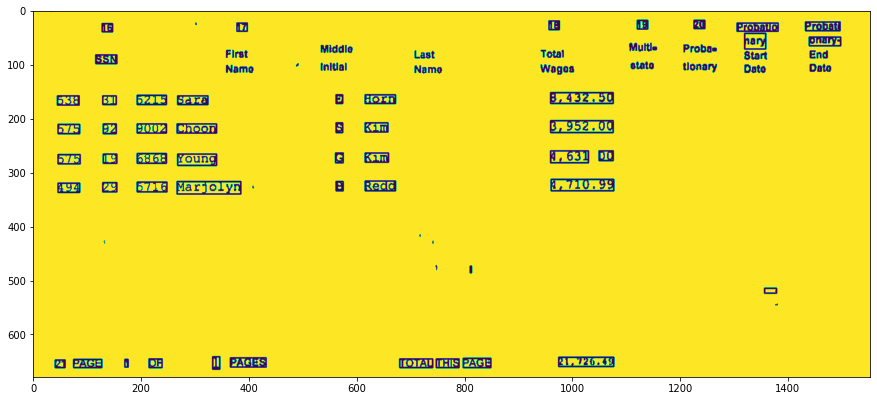

In [181]:
import cv2

image = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
plt.figure(figsize=(15,15))
plt.imshow(result)

gray_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding

# this step is require if you have colored image because if you skip this part

# then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(threshold_img)

word_list = []

last_word = ''

for word in details['text']:

    if word!='':
        word_list.append(word)

        last_word = word

    if (last_word!='' and word == '') or (word==details['text'][-1]):

        parse_text.append(word_list)

        word_list = []

import csv

with open('result_text.txt',  'w', newline="") as file:
    csv.writer(file, delimiter=" ").writerows(parse_text)
    
a_dataframe = pd.read_csv("result_text.txt",header=None,delimiter=' ', names=list(range(10)) )
a_dataframe

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


0          1      2         3        4      5         6         7  \
0       18         19     20  Probatlo  Probati    NaN       NaN       NaN   
1       p=         fs    fel        |e      Sle    NaN       NaN       NaN   
2   tntdal       Name  Wages     etato  tlonary   Date      Dato       NaN   
3      faa      awiee   epee         |        |      |       NaN       NaN   
4     [aia      nomen     ee       NaN      NaN    NaN       NaN       NaN   
5      raz    ewifone    eke        dT       mf     PP       NaN       NaN   
6     Vasa  snefecanm     fe       pee     esol     Pd       NaN       NaN   
7       PO        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
8        a          a    OOO       NaN      NaN    NaN       NaN       NaN   
9        a         OO    NaN       NaN      NaN    NaN       NaN       NaN   
10       a         OO    NaN       NaN      NaN    NaN       NaN       NaN   
11       a         CC    NaN       NaN      NaN    NaN       NaN       NaN   
12      16          :      7        18       19     20  Probatlo  —Probati   
13       .          .   nary    onary-      NaN    NaN       NaN       NaN   
14     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
15     538         31   5215      Sara        E   Horn  8,432.50       NaN   
16     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
17     575         19   6868     Young        G    Kim     4,631        00   
18     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
19       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
20      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
21      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
22      16          :      7        18       19     20  Probatlo  —Probati   
23       .          .   nary    onary-      NaN    NaN       NaN       NaN   
24     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
25     538         31   5215      Sara        E   Horn  8,432.50       NaN   
26     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
27     575         19   6868     Young        G    Kim     4,631        00   
28     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
29       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
30      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
31      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
32      16          :      7        18       19     20  Probatlo  —Probati   
33       .          .   nary    onary-      NaN    NaN       NaN       NaN   
34     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
35     538         31   5215      Sara        E   Horn  8,432.50       NaN   
36     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
37     575         19   6868     Young        G    Kim     4,631        00   
38     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
39       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
40      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
41      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
42      16          :      7        18       19     20  Probatlo  —Probati   
43       .          .   nary    onary-      NaN    NaN       NaN       NaN   
44     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
45     538         31   5215      Sara        E   Horn  8,432.50       NaN   
46     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
47     575         19   6868     Young        G    Kim     4,631        00   
48     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
49       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
50      ba        NaN    NaN   

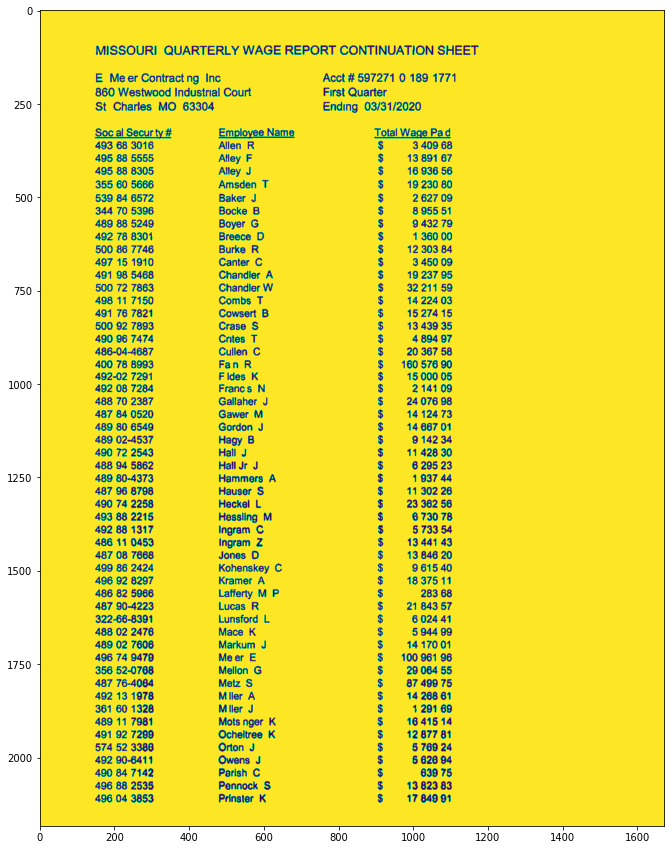

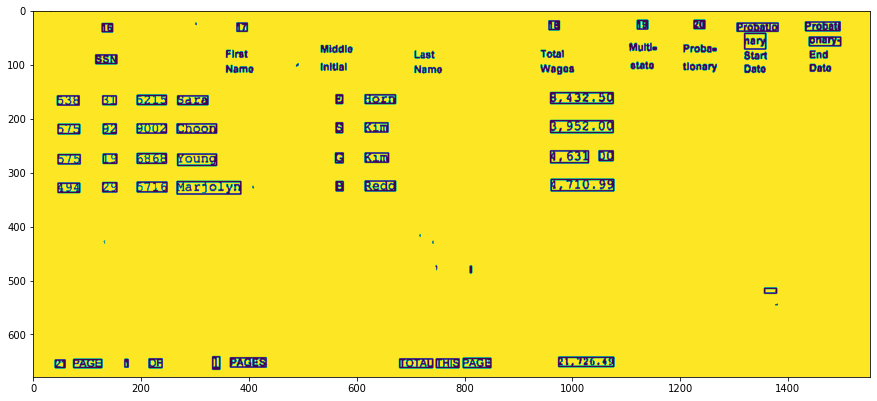

In [194]:
import cv2
import numpy as np

img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)
#cv2.imwrite('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img',res)
image = Image.fromarray(res)
image.save('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img.jpeg')

plt.figure(figsize = (15,15))
plt.imshow(res)

im = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img.jpeg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
plt.figure(figsize=(15,15))
plt.imshow(result)

gray_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding

# this step is require if you have colored image because if you skip this part

# then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(threshold_img)

word_list = []

last_word = ''

for word in details['text']:

    if word!='':
        word_list.append(word)

        last_word = word

    if (last_word!='' and word == '') or (word==details['text'][-1]):

        parse_text.append(word_list)

        word_list = []

import csv

with open('result_text.txt',  'w', newline="") as file:
    csv.writer(file, delimiter=" ").writerows(parse_text)
    
a_dataframe = pd.read_csv("result_text.txt",header=None,delimiter=' ', names=list(range(10)) )
a_dataframe


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


0          1      2         3        4      5         6         7  \
0       18         19     20  Probatlo  Probati    NaN       NaN       NaN   
1       p=         fs    fel        |e      Sle    NaN       NaN       NaN   
2   tntdal       Name  Wages     etato  tlonary   Date      Dato       NaN   
3      faa      awiee   epee         |        |      |       NaN       NaN   
4     [aia      nomen     ee       NaN      NaN    NaN       NaN       NaN   
5      raz    ewifone    eke        dT       mf     PP       NaN       NaN   
6     Vasa  snefecanm     fe       pee     esol     Pd       NaN       NaN   
7       PO        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
8        a          a    OOO       NaN      NaN    NaN       NaN       NaN   
9        a         OO    NaN       NaN      NaN    NaN       NaN       NaN   
10       a         OO    NaN       NaN      NaN    NaN       NaN       NaN   
11       a         CC    NaN       NaN      NaN    NaN       NaN       NaN   
12      16          :      7        18       19     20  Probatlo  —Probati   
13       .          .   nary    onary-      NaN    NaN       NaN       NaN   
14     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
15     538         31   5215      Sara        E   Horn  8,432.50       NaN   
16     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
17     575         19   6868     Young        G    Kim     4,631        00   
18     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
19       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
20      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
21      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
22      16          :      7        18       19     20  Probatlo  —Probati   
23       .          .   nary    onary-      NaN    NaN       NaN       NaN   
24     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
25     538         31   5215      Sara        E   Horn  8,432.50       NaN   
26     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
27     575         19   6868     Young        G    Kim     4,631        00   
28     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
29       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
30      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
31      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
32      16          :      7        18       19     20  Probatlo  —Probati   
33       .          .   nary    onary-      NaN    NaN       NaN       NaN   
34     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
35     538         31   5215      Sara        E   Horn  8,432.50       NaN   
36     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
37     575         19   6868     Young        G    Kim     4,631        00   
38     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
39       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
40      ba        NaN    NaN       NaN      NaN    NaN       NaN       NaN   
41      21       PAGE      1        OF        1  PAGES     TOTAL      THIS   
42      16          :      7        18       19     20  Probatlo  —Probati   
43       .          .   nary    onary-      NaN    NaN       NaN       NaN   
44     ‘sn         or     a=     ‘oats     tray     SS       NaN       NaN   
45     538         31   5215      Sara        E   Horn  8,432.50       NaN   
46     575         92   9002     Choon       S$    Kim  3,952.00       NaN   
47     575         19   6868     Young        G    Kim     4,631        00   
48     494         29   5716  Marjolyn        -      B      Redd  4,710.99   
49       ,          1    NaN       NaN      NaN    NaN       NaN       NaN   
50      ba        NaN    NaN   

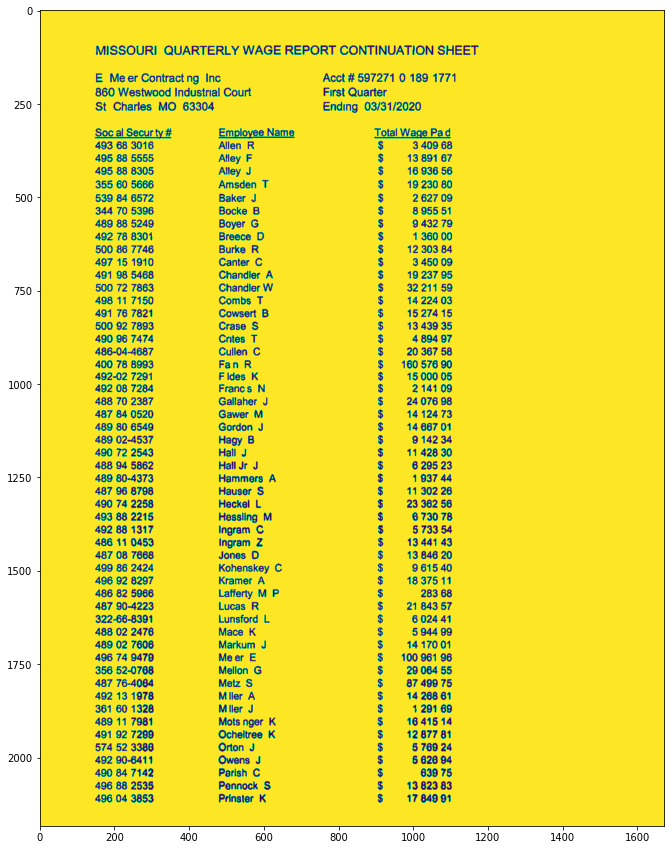

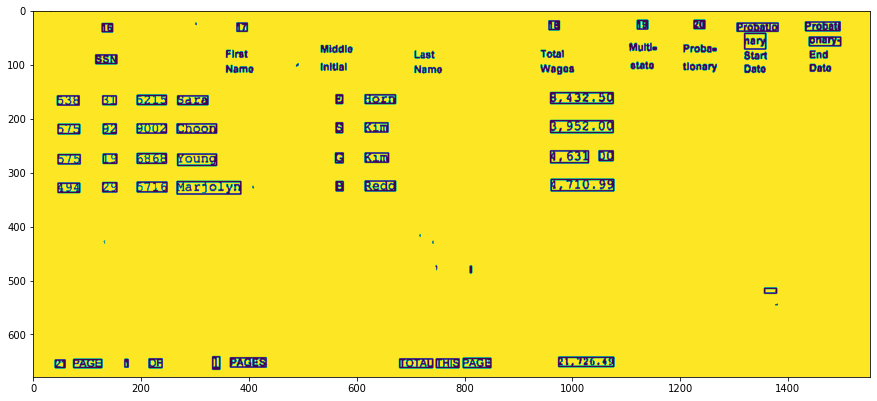

In [195]:
import cv2
import numpy as np

img = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/0327075000/table-000.png', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)
#cv2.imwrite('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img',res)
image = Image.fromarray(res)
image.save('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img.jpeg')

plt.figure(figsize = (15,15))
plt.imshow(res)

im = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img.jpeg')

im = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img.jpeg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
plt.figure(figsize=(15,15))
plt.imshow(result)

gray_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding

# this step is require if you have colored image because if you skip this part

# then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(threshold_img)

word_list = []

last_word = ''

for word in details['text']:

    if word!='':
        word_list.append(word)

        last_word = word

    if (last_word!='' and word == '') or (word==details['text'][-1]):

        parse_text.append(word_list)

        word_list = []

import csv

with open('result_text.txt',  'w', newline="") as file:
    csv.writer(file, delimiter=" ").writerows(parse_text)
    
a_dataframe = pd.read_csv("result_text.txt",header=None,delimiter=' ', names=list(range(10)) )
a_dataframe

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


<ipython-input-203-8c8d6b385343>:68: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  a_dataframe = pd.read_csv("result_text.txt",header=None,delimiter='  ', names=list(range(10)) )


0   1   2   3   4   5  \
0                            18 19 20 Probatlo Probati NaN NaN NaN NaN NaN   
1                                     p= fs fel |e Sle NaN NaN NaN NaN NaN   
2            tntdal Name Wages etato tlonary Date Dato NaN NaN NaN NaN NaN   
3                                 faa awiee epee | | | NaN NaN NaN NaN NaN   
4                                        [aia nomen ee NaN NaN NaN NaN NaN   
5                             raz ewifone eke dT mf PP NaN NaN NaN NaN NaN   
6                        Vasa snefecanm fe pee esol Pd NaN NaN NaN NaN NaN   
7                                                   PO NaN NaN NaN NaN NaN   
8                                              a a OOO NaN NaN NaN NaN NaN   
9                                                 a OO NaN NaN NaN NaN NaN   
10                                                a OO NaN NaN NaN NaN NaN   
11                                                a CC NaN NaN NaN NaN NaN   
12                   16 : 7 18 19 20 Probatlo —Probati NaN NaN NaN NaN NaN   
13                                     . . nary onary- NaN NaN NaN NaN NaN   
14                             ‘sn or a= ‘oats tray SS NaN NaN NaN NaN NaN   
15                    538 31 5215 Sara E Horn 8,432.50 NaN NaN NaN NaN NaN   
16                   575 92 9002 Choon S$ Kim 3,952.00 NaN NaN NaN NaN NaN   
17                    575 19 6868 Young G Kim 4,631 00 NaN NaN NaN NaN NaN   
18              494 29 5716 Marjolyn - B Redd 4,710.99 NaN NaN NaN NaN NaN   
19                                                 , 1 NaN NaN NaN NaN NaN   
20                                                  ba NaN NaN NaN NaN NaN   
21      21 PAGE 1 OF 1 PAGES TOTAL THIS PAGE 21,726.49 NaN NaN NaN NaN NaN   
22                   16 : 7 18 19 20 Probatlo —Probati NaN NaN NaN NaN NaN   
23                                     . . nary onary- NaN NaN NaN NaN NaN   
24                             ‘sn or a= ‘oats tray SS NaN NaN NaN NaN NaN   
25                    538 31 5215 Sara E Horn 8,432.50 NaN NaN NaN NaN NaN   
26                   575 92 9002 Choon S$ Kim 3,952.00 NaN NaN NaN NaN NaN   
27                    575 19 6868 Young G Kim 4,631 00 NaN NaN NaN NaN NaN   
28              494 29 5716 Marjolyn - B Redd 4,710.99 NaN NaN NaN NaN NaN   
29                                                 , 1 NaN NaN NaN NaN NaN   
30                                                  ba NaN NaN NaN NaN NaN   
31      21 PAGE 1 OF 1 PAGES TOTAL THIS PAGE 21,726.49 NaN NaN NaN NaN NaN   
32                   16 : 7 18 19 20 Probatlo —Probati NaN NaN NaN NaN NaN   
33                                     . . nary onary- NaN NaN NaN NaN NaN   
34                             ‘sn or a= ‘oats tray SS NaN NaN NaN NaN NaN   
35                    538 31 5215 Sara E Horn 8,432.50 NaN NaN NaN NaN NaN   
36                   575 92 9002 Choon S$ Kim 3,952.00 NaN NaN NaN NaN NaN   
37                    575 19 6868 Young G Kim 4,631 00 NaN NaN NaN NaN NaN   
38              494 29 5716 Marjolyn - B Redd 4,710.99 NaN NaN NaN NaN NaN   
39                                                 , 1 NaN NaN NaN NaN NaN   
40                                                  ba NaN NaN NaN NaN NaN   
41      21 PAGE 1 OF 1 PAGES TOTAL THIS PAGE 21,726.49 NaN NaN NaN NaN NaN   
42                   16 : 7 18 19 20 Probatlo —Probati NaN NaN NaN NaN NaN   
43                                     . . nary onary- NaN NaN NaN NaN NaN   
44                             ‘sn or a= ‘oats tray SS NaN NaN NaN NaN NaN   
45                    538 31 5215 Sara E Horn 8,432.50 NaN NaN NaN NaN NaN   
46                   575 92 9002 Choon S$ Kim 3,952.00 NaN NaN NaN NaN NaN   
47                    575 19 6868 Young G Kim 4,631 00 NaN NaN NaN NaN NaN   
48              494 29 5716 Marjolyn - B Redd 4,710.99 NaN NaN NaN NaN NaN   
49                                                 , 1 NaN NaN NaN NaN NaN   
50                                                  ba NaN NaN NaN NaN NaN 

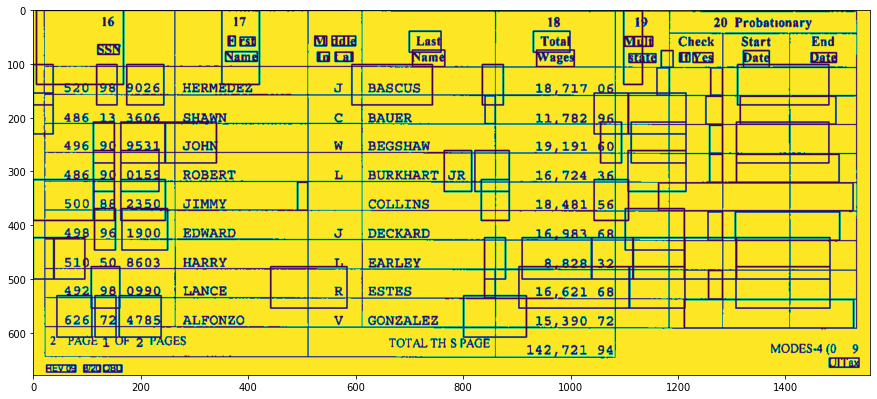

In [203]:
import cv2
import numpy as np

img = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/0268279000/table-000.png', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)
#cv2.imwrite('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img',res)
image = Image.fromarray(res)
image.save('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img1.jpeg')

plt.figure(figsize = (15,15))
plt.imshow(res)

imm = cv2.imread('/home/vimalkumar.s/Documents/file samples/test1/noiswe clear/noise_img1.jpeg')

gray_image = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding

# this step is require if you have colored image because if you skip this part

# then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(threshold_img)

word_list = []

last_word = ''

for word in details['text']:

    if word!='':
        word_list.append(word)

        last_word = word

    if (last_word!='' and word == '') or (word==details['text'][-1]):

        parse_text.append(word_list)

        word_list = []

import csv

with open('result_text.txt',  'w', newline="") as file:
    csv.writer(file, delimiter=" ").writerows(parse_text)
    
a_dataframe = pd.read_csv("result_text.txt",header=None,delimiter='  ', names=list(range(10)) )
a_dataframe

In [204]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [205]:
IMAGE_PATH = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg'


In [215]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH,paragraph="True")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[146, 87], [1179, 87], [1179, 127], [146, 127]],
  'MISSOURI QUARTERLY WAGE REPORT CONTINUATION SHEET'],
 [[[145, 160], [571, 160], [571, 279], [145, 279]],
  'E Meler Contracting, Inc 860 Westwood Industrial Court St  Charles, MO 63304'],
 [[[751, 163], [1119, 163], [1119, 281], [751, 281]],
  'Acct # 597271-0-189-1771 First Quarter Ending 03/31/2020'],
 [[[142, 310], [355, 310], [355, 2126], [142, 2126]],
  'Social Security # 493-88-3016 495-88-5555 495-88-8305 355-60-5666 539-84-6572 344-70-5396 489-88-5249 492-78-8301 500-86-7746 497-15-1910 491-98-5468 500-72-7863 498-11-7150 491-76-7821 500-92-7893 490-96-7474 486-04-4687 400-78-8993 492-02-7291 492-08-7284 488-70-2387 487-84-0520 489-80-6549 489-02-4537 490-72-2543 488-94-5862 489-80-4373 487-96-8798 490-74-2258 493-88-2215 492-88-1317 486-11-0453 487-08-7688 499-86-2424 496-92-8297 486-82-5986 487-90-4223 322-66-8391 488-02-2476 489-02-7806 496-74-9470 356-52-0788 487-76-4084 492-13-1978 361-60-1328 489-11-7981 491-92-7290 5

In [207]:
len(result)

6

In [210]:
result[5]

[[[891, 311], [1109, 311], [1109, 2127], [891, 2127]],
 'Total Wage Paid S 3,409 68 S 13,891 67 S 16,936 56 S 19,230 80 S 2,627 09 S 8,955 51 S 9,432 79 S 1. ,360 00 S 12,303 84 S 3,450 09 S 19,237 95 S 32,211 59 $ 14,224 03 $ 15,274 15 $ 13,439 35 $ 4,894 97 S 20,367 58 $ 160,576 90 15,000 05 S 2,141 09 S 24,076 98 $ 14,124 73 $ 14,887 01 6 9,142 34 S 11,428 30 S 0,295 23 $ 1,937 44 8 11,302 26 $ 23,362 56 $ 6,730 78 $ 5,733.54 S 13,441 43 S 13,846 20 S 9,615 40 $ 18,375 11 $ 283 68 S 21,843 57 $ 6,024 41 $ 5,944 99 S 14,170 01 S 100,961 96 S 29,064 55 S 87,499 75 $ 14,288 81 S 1,201 69 S 10,415 14 S 12,877 81 S 5,780.24 S 6,020.94 030.75 5 13,023.83 6 17,040.01']

In [212]:
df = pd.DataFrame(result[5])
df

0            1             2            3     4     5     6     7    \
0  [891, 311]  [1109, 311]  [1109, 2127]  [891, 2127]  None  None  None  None   
1           T            o             t            a     l           W     a   

    8     9     10    11    12    13    14    15    16    17    18    19   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     g     e           P     a     i     d           S           3     ,   

    20    21    22    23    24    25    26    27    28    29    30    31   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     4     0     9           6     8           S           1     3     ,   

    32    33    34    35    36    37    38    39    40    41    42    43   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     8     9     1           6     7           S           1     6     ,   

    44    45    46    47    48    49    50    51    52    53    54    55   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     9     3     6           5     6           S           1     9     ,   

    56    57    58    59    60    61    62    63    64    65    66    67   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     2     3     0           8     0           S           2     ,     6   

    68    69    70    71    72    73    74    75    76    77    78    79   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     2     7           0     9           S           8     ,     9     5   

    80    81    82    83    84    85    86    87    88    89    90    91   \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     5           5     1           S           9     ,     4     3     2   

    92    93    94    95    96    97    98    99    100   101   102   103  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           7     9           S           1     .           ,     3     6   

    104   105   106   107   108   109   110   111   112   113   114   115  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     0           0     0           S           1     2     ,     3     0   

    116   117   118   119   120   121   122   123   124   125   126   127  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1     3           8     4           S           3     ,     4     5     0   

    128   129   130   131   132   133   134   135   136   137   138   139  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           0     9           S           1     9     ,     2     3     7   

    140   141   142   143   144   145   146   147   148   149   150   151  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           9     5           S           3     2     ,     2     1     1   

    152   153   154   155   156   157   158   159   160   161   162   163  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           5     9           $           1     4     ,     2     2     4   

    164   165   166   167   168   169   170   171   172   173   174   175  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           0     3           $           1     5     ,     2     7     4   

    176   177   178   179   180   181   182   183   184   185   186   187  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           1     5           $           1     3     ,     4     3     9   

    188   189   190   191   192   193   194   195   196   197   198   199  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1           3     5           $           4     ,     8     9     4         

    200   201   202   203   204   205   206   207   20

In [214]:
df = pd.DataFrame({'col':result[5]})
df

col
0  [[891, 311], [1109, 311], [1109, 2127], [891, ...
1  Total Wage Paid S 3,409 68 S 13,891 67 S 16,93...

In [216]:
tuple(result[5])

([[891, 311], [1109, 311], [1109, 2127], [891, 2127]],
 'Total Wage Paid S 3,409 68 S 13,891 67 S 16,936 56 S 19,230 80 S 2,627 09 S 8,955 51 S 9,432 79 S 1. ,360 00 S 12,303 84 S 3,450 09 S 19,237 95 S 32,211 59 $ 14,224 03 $ 15,274 15 $ 13,439 35 $ 4,894 97 S 20,367 58 $ 160,576 90 15,000 05 S 2,141 09 S 24,076 98 $ 14,124 73 $ 14,887 01 6 9,142 34 S 11,428 30 S 0,295 23 $ 1,937 44 8 11,302 26 $ 23,362 56 $ 6,730 78 $ 5,733.54 S 13,441 43 S 13,846 20 S 9,615 40 $ 18,375 11 $ 283 68 S 21,843 57 $ 6,024 41 $ 5,944 99 S 14,170 01 S 100,961 96 S 29,064 55 S 87,499 75 $ 14,288 81 S 1,201 69 S 10,415 14 S 12,877 81 S 5,780.24 S 6,020.94 030.75 5 13,023.83 6 17,040.01')

In [217]:
cleaned = [item for item in result if not isinstance(item,list)]

print(cleaned)

[]


In [218]:
for j in result[5]:
    print(j)

[[891, 311], [1109, 311], [1109, 2127], [891, 2127]]
Total Wage Paid S 3,409 68 S 13,891 67 S 16,936 56 S 19,230 80 S 2,627 09 S 8,955 51 S 9,432 79 S 1. ,360 00 S 12,303 84 S 3,450 09 S 19,237 95 S 32,211 59 $ 14,224 03 $ 15,274 15 $ 13,439 35 $ 4,894 97 S 20,367 58 $ 160,576 90 15,000 05 S 2,141 09 S 24,076 98 $ 14,124 73 $ 14,887 01 6 9,142 34 S 11,428 30 S 0,295 23 $ 1,937 44 8 11,302 26 $ 23,362 56 $ 6,730 78 $ 5,733.54 S 13,441 43 S 13,846 20 S 9,615 40 $ 18,375 11 $ 283 68 S 21,843 57 $ 6,024 41 $ 5,944 99 S 14,170 01 S 100,961 96 S 29,064 55 S 87,499 75 $ 14,288 81 S 1,201 69 S 10,415 14 S 12,877 81 S 5,780.24 S 6,020.94 030.75 5 13,023.83 6 17,040.01


In [221]:
len(result[5][1])

614

In [224]:
x = []
for i in range(0,len(result)):
    #print(result[i][1])
    x.append(result[i][1])
print(x)

['MISSOURI QUARTERLY WAGE REPORT CONTINUATION SHEET', 'E Meler Contracting, Inc 860 Westwood Industrial Court St  Charles, MO 63304', 'Acct # 597271-0-189-1771 First Quarter Ending 03/31/2020', 'Social Security # 493-88-3016 495-88-5555 495-88-8305 355-60-5666 539-84-6572 344-70-5396 489-88-5249 492-78-8301 500-86-7746 497-15-1910 491-98-5468 500-72-7863 498-11-7150 491-76-7821 500-92-7893 490-96-7474 486-04-4687 400-78-8993 492-02-7291 492-08-7284 488-70-2387 487-84-0520 489-80-6549 489-02-4537 490-72-2543 488-94-5862 489-80-4373 487-96-8798 490-74-2258 493-88-2215 492-88-1317 486-11-0453 487-08-7688 499-86-2424 496-92-8297 486-82-5986 487-90-4223 322-66-8391 488-02-2476 489-02-7806 496-74-9470 356-52-0788 487-76-4084 492-13-1978 361-60-1328 489-11-7981 491-92-7290 574-52-3380 492-90-8411 490-84-7142 496-88-2539 496-04-3853', 'Employee Name Allen, R Alley, F Alley; Amsden; Baker, Bocke, B Boyer, G Breece, D Burke, R Canter , C, Chandler, A Chandler W Combs, T Cowsert;, B Crase, S Crit

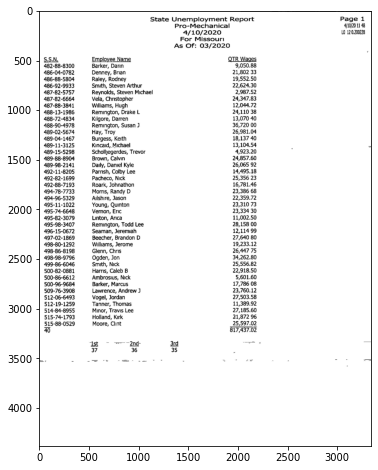

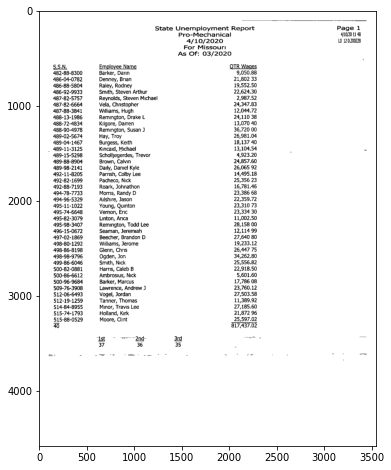

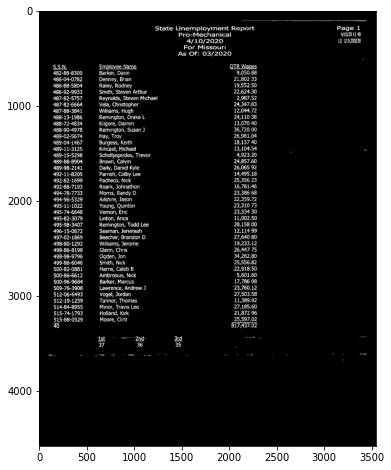

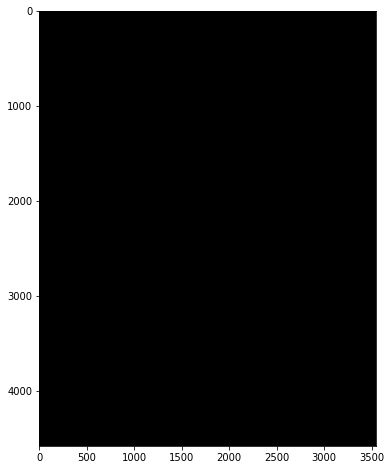

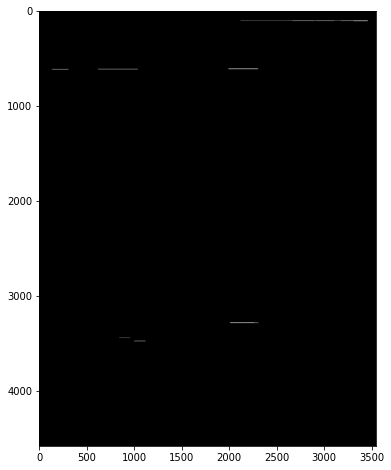

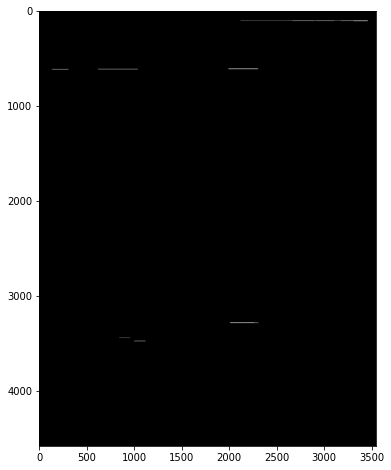

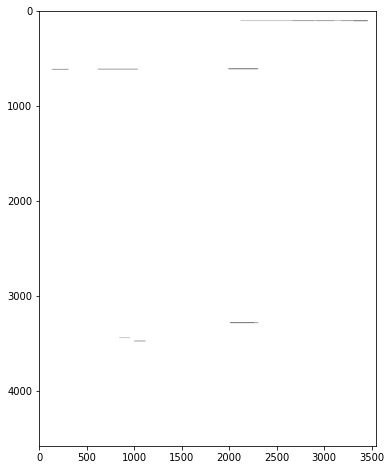

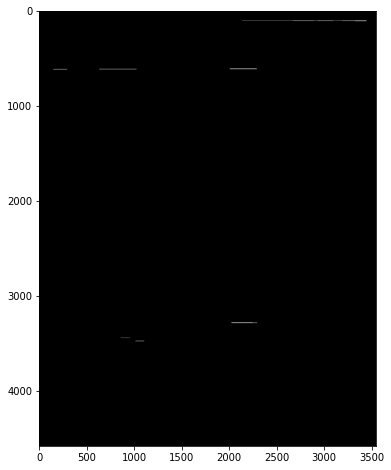

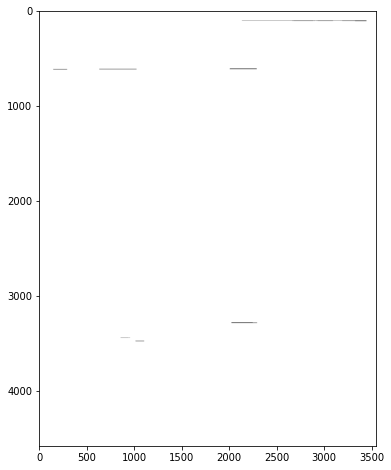

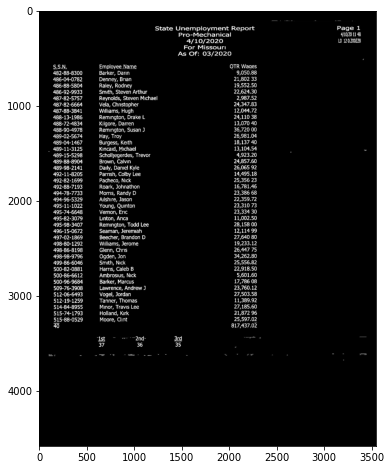

In [1]:
import cv2
import numpy as np 
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import statistics

plt.rcParams['figure.figsize'] = [15, 8]

img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0641988000.jpeg',0)
img.shape

imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])
img123 = img1.copy()

(thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

th3 = 255-th3

imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

if(th3.shape[0]<1000):
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1]])
    
else:
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
    
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)


imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()


# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)


imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

hor_ver = 255-hor_ver

imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

temp = cv2.subtract(th3,hor_ver)

imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

temp = 255-temp


imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

tt = cv2.bitwise_xor(img1,temp)

imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

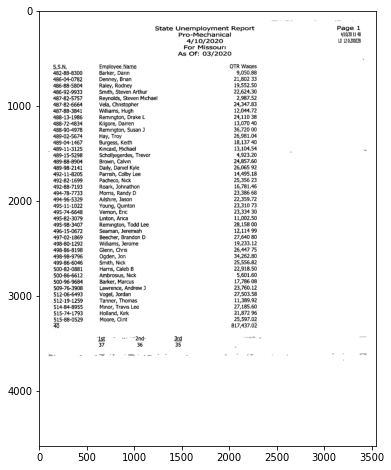

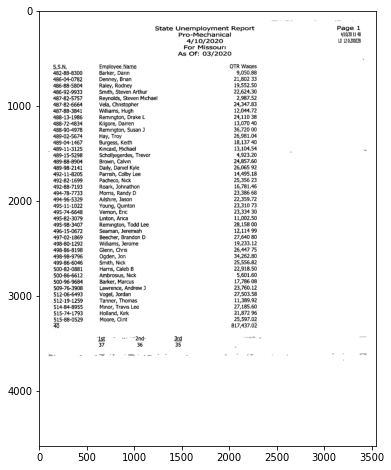

In [2]:
iii = cv2.bitwise_not(tt)


imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

tt1=iii.copy()


imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

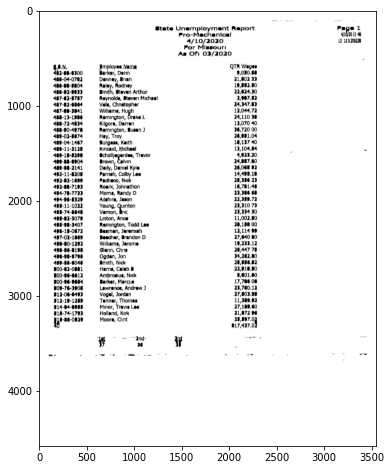

In [3]:

#kernel initialization
ver1 = np.array([[1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1]])

hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1,1]])

temp1 = cv2.erode(tt1, ver1, iterations=1)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

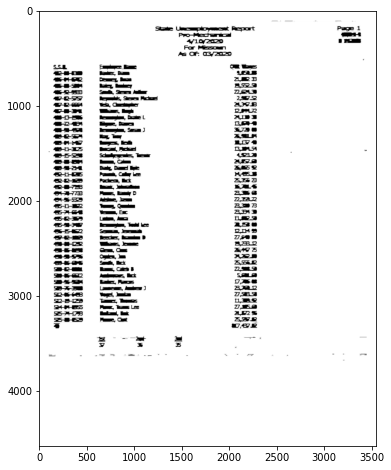

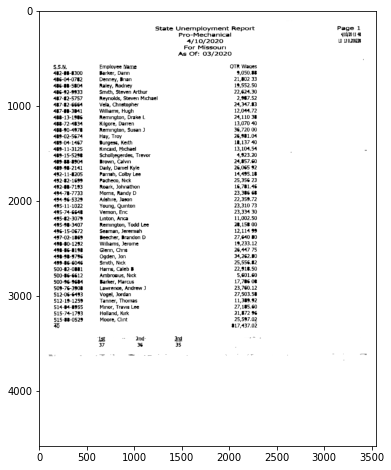

In [4]:
temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()


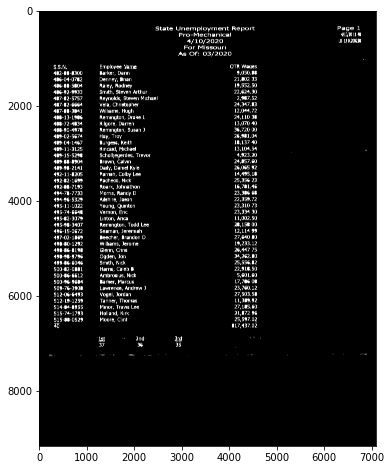

In [5]:
dim1 = (hor_ver.shape[1],hor_ver.shape[0])

dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

want = cv2.bitwise_not(resized)
imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

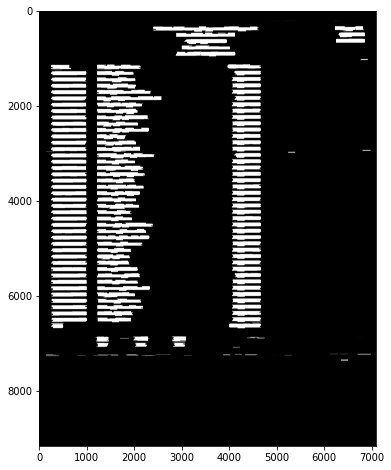

In [6]:
if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])
    
tt1 = cv2.dilate(want,kernel1,iterations=14)
imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [7]:
resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [8]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [35]:
(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
heightlist.sort()

sportion = int(0.15*len(heightlist))

eportion = int(0.1*len(heightlist))


In [36]:

#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

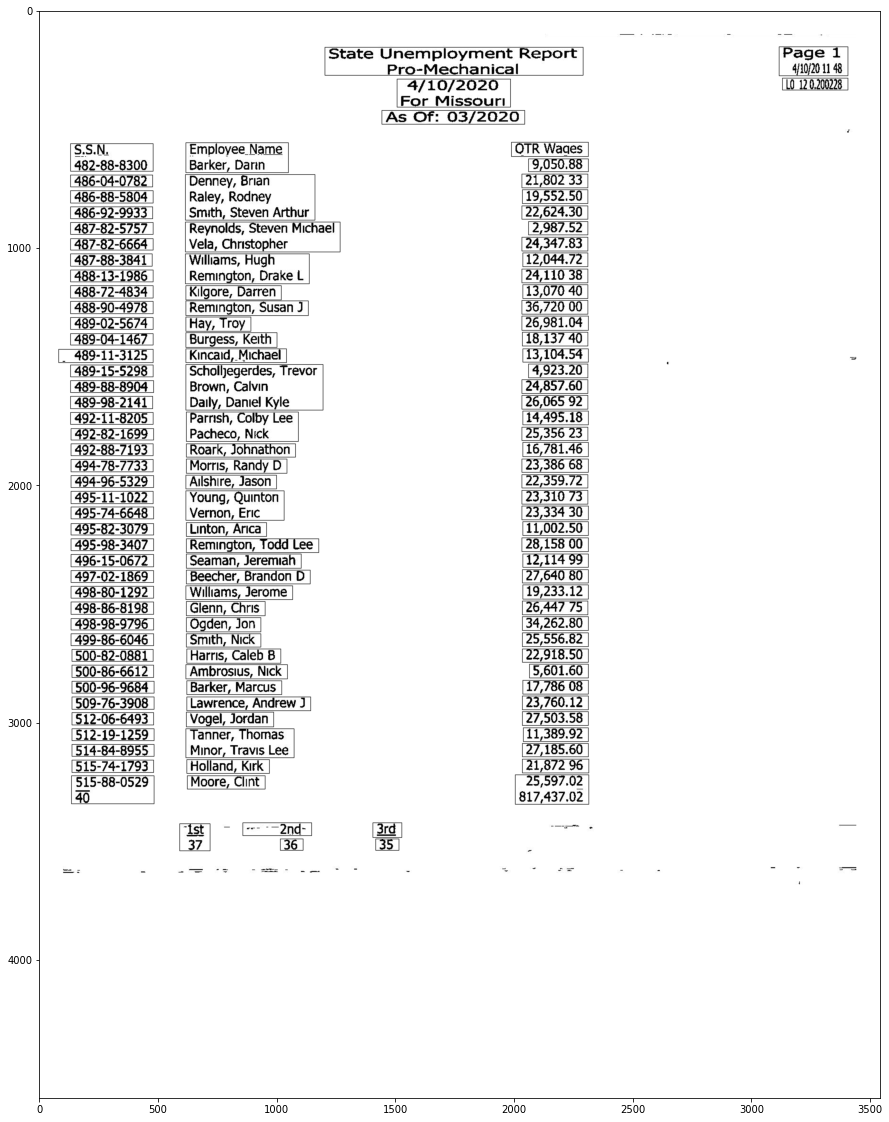

In [37]:
box =[]
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    #print(x)
    #print(y)
    #print(w)
    #print(h)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-10,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    
plt.figure(figsize=(20,20))
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()
#cv2.imwrite('imagegen.jpg',image)


In [358]:
main=[]
j=0
l=[]
for i in range(len(box)):    
    if(i==0):
        l.append(box[i])
        last=box[i]
    else:
        if(box[i][1]<=last[1]+medianheight/2):
            l.append(box[i])
            last=box[i]
            if(i==len(box)-1):
                main.append(l)
        else:
#             print(l)            
            main.append(l)
            l=[]
            last = box[i]
            l.append(box[i])

In [359]:
#calculating maximum number of box in a particular row
maxsize=0
for i in range(len(main)):
    l=len(main[i])
    if(maxsize<=l):
        maxsize=l
        
ylist=[]
for i in range(len(boundingBoxes)):
    ylist.append(boundingBoxes[i][0])
    
ymax = max(ylist)
ymin = min(ylist)

ymaxwidth=0
for i in range(len(boundingBoxes)):
    if(boundingBoxes[i][0]==ymax):
        ymaxwidth=boundingBoxes[i][2]
        
TotWidth = ymax+ymaxwidth-ymin

width = []
widthsum=0
for i in range(len(main)):
    for j in range(len(main[i])):
        widthsum = main[i][j][2]+widthsum
    
#     print(" Row ",i,"total width",widthsum)
    width.append(widthsum)
    widthsum=0
    
main1=[]
flag=0
for i in range(len(main)):
    if(i==0):
        if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
            flag = 1
    else:
        if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
            flag=1
           
        elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
             flag=1
             
        elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
            flag=1
    
        
    if(flag==1):
        pass
    else:
        main1.append(main[i])
    
    flag=0

In [360]:
maxsize1=0
for i in range(len(main1)):
    l=len(main1[i])
    if(maxsize1<=l):
        maxsize1=l
    
midpoint=[]
for i in range(len(main1)):
    if(len(main1[i])==maxsize1):
#         print(main1[i])
        for j in range(maxsize1):
            midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
        break
        
midpoint=np.array(midpoint)
midpoint.sort()

final = [[]*maxsize1]*len(main1)

for i in range(len(main1)):
    for j in range(len(main1[i])):
        min_idx = j        
        for k in range(j+1,len(main1[i])):
            if(main1[i][min_idx][0]>main1[i][k][0]):
                min_idx = k
        
        main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]
        
finallist = []
for i in range(len(main1)):
    lis=[ [] for k in range(maxsize1)]
    for j in range(len(main1[i])):
#         diff=np.zeros[maxsize]
        diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
        minvalue = min(diff)
        ind = list(diff).index(minvalue)
#         print(minvalue)
        lis[ind].append(main1[i][j])
#     print('----------------------------------------------')
    finallist.append(lis)
    
todump=[]
for i in range(len(finallist)):
    for j in range(len(finallist[i])):
        to_out=''
        if(len(finallist[i][j])==0):
            print('-')
            todump.append(' ')
        
        else:
            for k in range(len(finallist[i][j])):                
                y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                roi = iii[x:x+h, y+2:y+w]
                roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                kernel = np.ones((2, 1), np.uint8)
                img = cv2.dilate(img, kernel, iterations=1)
                img = cv2.erode(img, kernel, iterations=2)
                img = cv2.dilate(img, kernel, iterations=1)
                
                

                out = pytesseract.image_to_string(img)
                if(len(out)==0):
                    out = pytesseract.image_to_string(img,config='-psm 10')
                
                to_out = to_out +" "+out
                
            print(to_out)
                
            todump.append(to_out)
#             cv2.imshow('image',img)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
    

            
            
           
    print("--------------------------------------------------")

 S.S.N.
482-88-8300

 Employee Name
Barker, Darin

 QTR Waaes

--------------------------------------------------
-
-
 9,050.88

--------------------------------------------------
 
 Denney, Brian
Raley, Rodney
Smith, Steven Arthur

 21,802 33

--------------------------------------------------
 486-88-5804

-
 19,552.50

--------------------------------------------------
 
-
 22,624.30

--------------------------------------------------
 
 Reynolds, Steven Michael
Vela, Christopher

 2,987.52

--------------------------------------------------
 487-82-6664

-
 24,347.83

--------------------------------------------------
 487-88-3841

 Willams, Hugh
Remington, Drake L

 12,044.72

--------------------------------------------------
 
-
 24,110 38

--------------------------------------------------
 488-72-4834

 Kilgore, Darren

 13,070 40

--------------------------------------------------
 488-90-4978

 Remington, Susan J

 36,720 00

----------------------

In [361]:
npdump = np.array(todump)

dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))

dataframe


0  \
0    S.S.N.\n482-88-8300\n
   
1                             
2                         
   
3            486-88-5804\n
   
4                         
   
5                         
   
6            487-82-6664\n
   
7            487-88-3841\n
   
8                         
   
9            488-72-4834\n
   
10           488-90-4978\n
   
11                        
   
12           489-04-1467\n
   
13                        
   
14                        
   
15           489-88-8904\n
   
16           489-98-2141\n
   
17           492-11-8205\n
   
18                        
   
19                        
   
20           494-78-7733\n
   
21                        
   
22           495-11-1022\n
   
23                        
   
24                        
   
25                        
   
26           496-15-0672\n
   
27          497-002-1869\n
   
28                        
   
29           498-86-8198\n
   
30                        
   
31                        
   
32                        
   
33           500-86-6612\n
   
34           500-96-9684\n
   
35           509-76-3908\n
   
36           512-06-6493\n
   
37                        
   
38                        
   
39           515-74-1793\n
   
40       515-88-0529\n40\n
   

                                                    1  \
0                     Employee Name\nBarker, Darin\n
   
1                                                       
2    Denney, Brian\nRaley, Rodney\nSmith, Steven A...   
3                                                       
4                                                       
5      Reynolds, Steven Michael\nVela, Christopher\n
   
6                                                       
7                Willams, Hugh\nRemington, Drake L\n
   
8                                                       
9                                  Kilgore, Darren\n
   
10                              Remington, Susan J\n
   
11                                       Hay, Troy\n
   
12                                  Burgess, Keith\n
   
13                                Kincaid, Michael\n
   
14           Scholljegerdes, Trevor\nBrown, Calvin\n
   
15                                                      
16   Daily, Daniel Kyle\nParrish, Colby Lee\nPache...   
17                                                      
18                                                      
19                                Roark, Johnathon\n
   
20                                 Morris, Randy D\n
   
21                                 Ailshire, Jason\n
   
22                    Young, Quinton\nVernon, Eric\n
   
23                                                      
24                                   Linton, Arica\n
   
25                             Remington, Todd Lee\n
   
26                                Seaman, Jeremiah\n
   
27                              Beecher, Brandon D\n
   
28                                Williams, Jerome\n
   
29                                    Glenn, Chris\n
   
30                                      Ogden, Jon\n
   
31                                     Smith, Nick\n
   
32                                 Harris, Caleb B\n
   
33                                 Ambrosius, Nick\n
   
34                                  Barker, Marcus\n
   
35                              Lawrence, Andrew J\n
   
36                                   Vogel, Jordan\n
   
37               Tanner, Thomas\nMinor, Travis Lee\n
   
38                                                      
39                                   Holland, Kirk\n
   
40                                    Moore, Clint\n
   

                            2  
0                QTR Waaes\n
  
1                 9,050.88\n
  
2                21,802 33\n
  
3                19,552.50\n
  
4                22,624.30\n
  
5                 2,987.52\n
  
6                24,347.83\n
  
7                12,044.72\n
  
8                24,110 38\n
  
9       

In [1]:
import cv2
import pytesseract

#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load image, grayscale, and Otsu's threshold
image = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 2)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 3)

# Dilate to connect text and remove dots
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
dilate = cv2.dilate(thresh, kernel, iterations=2)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

# Bitwise-and to reconstruct image
result = cv2.bitwise_and(image, image, mask=dilate)
result[dilate==0] = (255,255,255)

# OCR
data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)

MISSOURI QUARTERLY WAGE REPORT CONTINUATION SHEET
E Meter Contracting, Inc Acct # 597271-0-189-1771
860 Westwood Industrial Court First Quarter

St Charles, MO 63304 Ending 03/31/2020

Social Security # Emplovee Name Total Waae Paid
493-68-3016 Allen, R $ 3,409 68
495-88-5555 Alley, F $ 13,891 67
495-88-8305 Alley, J $ 16,936 56
355-60-5666 Amsden, T $ 19,230 80
539-84-6572 Baker, J $ 2,627 09
344-70-5396 Bocke, B $ 8,955 51
489-88-5249 Boyer, G $ 9,432 79
492-78-8301 Breece, D $ 1,360 00
500-86-7746 Burke, R $ 12,303 84
497-15-1910 Canter, C. $ 3,450 09
491-98-5468 Chandler, A $ 19,237 95
500-72-7863 Chandler W $ 32,211 59
498-11-7150 Combs, T $ 14,224 03
491-76-7821 Cowsert, B $ 15,274 15
500-92-7893 Crase, S $ 13,439 35
490-96-7474 Crites, T $ 4,894 97
486-04-4687 Cullen, C $ 20,367 58
400-78-8993 Fain, R $ 160,576 90
492-02-7291 Fildes, K $ 15,000 05
492-08-7284 Francis, N $ 2,141 09
488-70-2387 Gallaher, J $ 24,076 98
487-84-0520 Gawer, M $ 14,124 73
489-80-6549 Gordon, J $ 14,667